# NLP Project: Modeling 2

In [1]:
# general imports
import numpy as np
import pandas as pd
import itertools

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# classification tools
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import ComplementNB, MultinomialNB
from sklearn.model_selection import cross_val_score

# NLP
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import nltk.sentiment

# local modules
import wrangle as w
import modeling as m

# warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
train, validate, test = w.split_data()

In [3]:
train.head()

,repo,language,original,basic_clean,clean,stemmed,lemmatized,word_count,stopword_count,stopword_ratio,compound_sentiment,num_unique,percent_unique
71,./cozodb/cozo,Rust,"<img src=""static/logo_c.png"" width=""200"" heigh...",img srcstaticlogocpng width200 height175 altlo...,img srcstaticlogocpng width200 height175 altlo...,img srcstaticlogocpng width200 height175 altlo...,img srcstaticlogocpng width200 height175 altlo...,2320,884,38.10,0.9985,713,30.73
149,./OpenTalker/video-retalking,Python,"<div align=""center"">\n\n<h2>VideoReTalking <br...",div aligncenterh2videoretalking br span stylef...,div aligncenterh2videoretalking br span stylef...,div aligncenterh2videoretalk br span stylefont...,div aligncenterh2videoretalk br span stylefont...,535,145,27.10,0.9766,272,50.84
6,./microsoft/Web-Dev-For-Beginners,JavaScript,[![GitHub license](https://img.shields.io/gith...,github licensehttpsimgshieldsiogithublicensemi...,github licensehttpsimgshieldsiogithublicensemi...,github licensehttpsimgshieldsiogithublicensemi...,github licensehttpsimgshieldsiogithublicensemi...,1422,507,35.65,0.9968,450,31.65
162,./ChanseyIsTheBest/NX-60FPS-RES-GFX-Cheats,Python,# NX-60FPS-RES-GFX-Cheats\n\n![fpsdemo1](https...,nx60fpsresgfxcheatsfpsdemo1httpsuserimagesgit...,nx60fpsresgfxcheatsfpsdemo1httpsuserimagesgith...,nx60fpsresgfxcheatsfpsdemo1httpsuserimagesgith...,nx60fpsresgfxcheatsfpsdemo1httpsuserimagesgith...,661,256,38.73,-0.9940,245,37.07
91,./datafuselabs/databend,Rust,"<h1 align=""center"">The Future of Cloud Data An...",h1 aligncenterthe future of cloud data analyti...,h1 aligncenterthe future cloud data analyticsh...,h1 aligncenterth futur cloud data analyticsh1d...,h1 aligncenterth futur cloud data analyticsh1d...,778,258,33.16,0.9971,359,46.14


In [4]:
# X_train = train['lemmatized']
# X_validate = validate['lemmatized']
# X_test = test['lemmatized']
# y_train = train.language
# y_validate = validate.language
# y_test = test.language

In [5]:
# X_train.info()

In [6]:
# y_test.info()

In [7]:
# X_train.head()

In [8]:
# tfidf = TfidfVectorizer()
# X_train = tfidf.fit_transform(X_train)
# X_validate = tfidf.transform(X_validate)
# X_test = tfidf.transform(X_test)

In [9]:
# X_train


In [10]:
# X_train.todense()

In [11]:
# rf = RandomForestClassifier()
# rf.fit(X_train, y_train)
# preds = rf.predict(X_train)
# accuracy_train = rf.score(X_train, y_train)
# accuracy_val = rf.score(X_validate, y_validate)
# print(accuracy_train, accuracy_val)

In [12]:
# df = m.knn_classification_plus(train, validate, 'language')
# df.sort_values('accuracy_val', ascending=False)

In [13]:
# model_data(train, validate, 'language')

In [14]:
# df = m.knn_classification(train, validate, 'language')
# df.sort_values('accuracy_val', ascending=False)

In [15]:
# df = m.nb_classification(train, validate, 'language')
# df.sort_values('accuracy_val', ascending=False)

In [16]:
# df = m.nb_classification_plus(train, validate, 'language')
# df.sort_values('accuracy_val', ascending=False)

In [17]:
# m.model_data_plus(train, validate, 'language')

In [18]:
# m.model_data(train, validate, 'language')

In [19]:
m.knn_classification(train, validate, 'language')

,hyperparams,accuracy_train,accuracy_val,algorithm
0,2,0.791209,0.625,knn
1,4,0.769231,0.650,knn
2,6,0.769231,0.750,knn
3,8,0.780220,0.700,knn
4,10,0.813187,0.800,knn
5,12,0.813187,0.775,knn
6,14,0.802198,0.775,knn
7,16,0.791209,0.850,knn
8,18,0.813187,0.825,knn
9,20,0.780220,0.825,knn


In [20]:
validate.shape

(40, 13)

In [21]:

df = (pd.concat([train, validate, test], axis=0).sort_index())
df = df[['language', 'lemmatized']]


In [22]:
X = df['lemmatized']
y = df['language']

In [23]:
k_values = [i for i in range (1,31)]
scores = []

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=3)
    scores.append(np.mean(score))

In [24]:
scores

[0.573063973063973,
 0.5054994388327722,
 0.5665544332210999,
 0.5664421997755331,
 0.5966329966329966,
 0.5968574635241302,
 0.5847362514029181,
 0.5967452300785634,
 0.6029180695847361,
 0.6333333333333333,
 0.6514029180695847,
 0.6573512906846241,
 0.6333333333333333,
 0.6272727272727273,
 0.6393939393939394,
 0.6700336700336701,
 0.6028058361391695,
 0.6392817059483726,
 0.6210998877665544,
 0.603030303030303,
 0.6093153759820428,
 0.6154882154882155,
 0.6151515151515151,
 0.6092031425364759,
 0.5909090909090909,
 0.6154882154882155,
 0.6395061728395062,
 0.6032547699214366,
 0.6154882154882155,
 0.6094276094276094]

Text(0, 0.5, 'Accuracy Score')

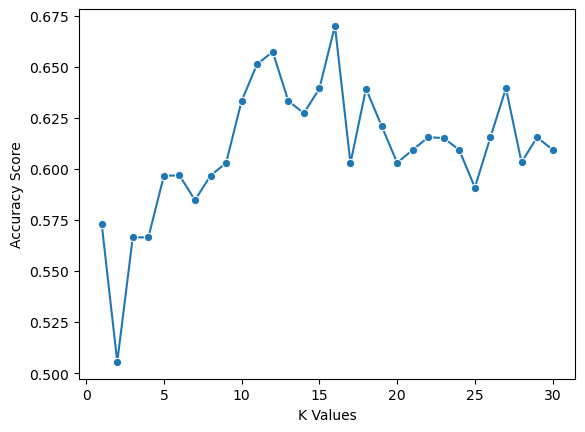

In [25]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [26]:
m.best_model_on_test(train, validate, test, 'language', )

,hyperparams,accuracy_train,accuracy_validate,accuracy_test,algorithm
0,16,0.791209,0.85,0.606061,knn
